# КН-32 Рачинська Анастасія

## Лабораторна робота №1 “Linear Regression”

Мета: навчитись реалізовувати лінійну регресію та градієнтний спуск.

Завдання:
1. Викачати дані з https://drive.google.com/drive/folders/17Xwk2quPb1gFmjG3KVIoZqChrWdcZ8XS?usp=sharing
2. Реалізувати лінійну регресію, яка за допомогою даних з колонки “x” прогнозує значення в колонці “y” (перша колонка у файлах - просто індекс, не ознака, не потрібно її використовувати). Тренування алгоритму повинно відбуватись лише на даних з train датасету. Test датасет слугує для перевірки якості вже натренованої моделі.
    - Візуалізувати дані з lab1_train.csv.
    - Після кожної епохи виводити поточні значення ваг та функції втрат. Використовувати Mean Squared Error як функцію втрат.
    - Після того, як градієнтний спуск зійшовся, порахувати функцію втрат на тестових даних з lab1_test.csv.
    - Візуалізувати на одному графіку дані з lab1_train.csv,  lab1_test.csv та лінію, до якої зійшовся розв’язок.

## Хід роботи

Для початку заванатжимо всі необхідні бібліотеки:

In [5]:
import numpy as np
import matplotlib.pyplot as plt

Тепер викачаємо дані з тренувального сету "lab_1_train.csv":

In [6]:
train_data = np.loadtxt("lab_1_train.csv", delimiter=",", skiprows=1)
train_data_processed = train_data[:,[1,2]]

Візуалізуємо дані з lab1_train.csv:

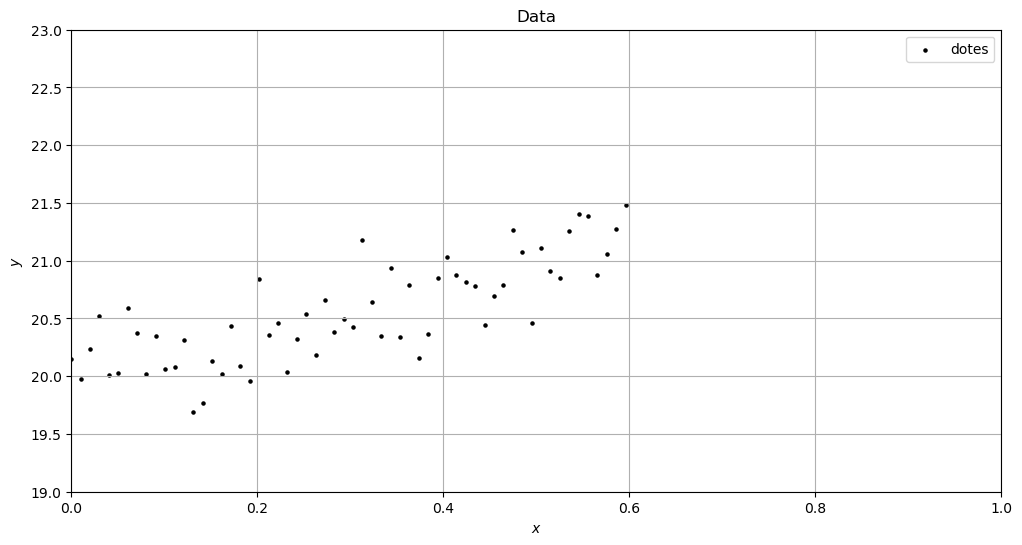

In [7]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,1,1)
ax.grid(True)
ax.set_xlim(0,1)
ax.set_ylim(19,23)
x_vals_train = [i[0] for i in train_data_processed] 
y_vals_train = [i[1] for i in train_data_processed]
ax.scatter(x_vals_train, y_vals_train, zorder=1, color='black', label="dotes", s=5)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title('Data')
plt.legend()
plt.show(block=False)

Далі пропишемо функції MeanSquareError та реалізуємо лінійну регресію з градієнтним спуском (в якості критерію зупинки візьмемо стабілізацію шуканих b0 та b1 - якщо різниця значеннь між двома послідовними ітераціями менше заданого epsilon, значить шуканий параметр "стабілізувався"):

In [18]:
def MeanSquareError(data, b0, b1):
    return sum((y - (b0 + b1 * x))**2 for x, y in data) / data.shape[0]
    
def LinearRegression(data, b0, b1, alfa, epsilon):
    
    # порахуємо функцію втрат для початкових даних
    prev_cost = MeanSquareError(data, b0, b1)
    print(f"cost_func = {prev_cost:.5f} when b0 = {b0:.5f} and b1 = {b1:.5f}")
    
    # забезпечимо вхід у цикл, що підбиратиме найкращі коефіцієнти
    new_b0 = b0 + epsilon * 2
    new_b1 = b1 + epsilon * 2

    # кількість рядків у датасеті
    m = data.shape[0]

    # число ітерацій
    n=0

    # основний цикл роботи
    while abs(new_b0 - b0) > epsilon or abs(new_b1 - b1) > epsilon:
        n += 1
        b0, b1 = new_b0, new_b1
        
        # розрахунок частини формули з сумою
        temp_sum_for_b0 = temp_sum_for_b1 = 0
        for i in range(m):
            temp = data[i][1] - (b0 + b1 * data[i][0])
            temp_sum_for_b0 += temp
            temp_sum_for_b1 += temp * data[i][0]

        # основні розрахунки за формулою
        new_b0 = b0 + alfa * temp_sum_for_b0 / m
        new_b1 = b1 + alfa * temp_sum_for_b1 / m

        #виведення результатів на ітерації
        new_cost = MeanSquareError(data, new_b0, new_b1)
        print(f"n = {n} cost_func = {new_cost:.5f} when b0 = {new_b0:.5f} and b1 = {new_b1:.5f}")
        
    return new_b0, new_b1

Запустимо функцію лінійної регресії для пошуку параметрів b0, b1, взявши їхні початкові значення 22 та 3, коефіцієнт в градієнтному спуску 0.1 та epsilon = 0.00:

In [19]:
b0, b1 = LinearRegression(train_data_processed, 22, 3, 0.1, 0.0001)

cost_func = 5.60105 when b0 = 22.00000 and b1 = 3.00000
n = 1 cost_func = 4.46207 when b0 = 21.76574 and b1 = 2.92721
n = 2 cost_func = 3.55715 when b0 = 21.55689 and b1 = 2.86208
n = 3 cost_func = 2.83896 when b0 = 21.37088 and b1 = 2.80394
n = 4 cost_func = 2.26898 when b0 = 21.20519 and b1 = 2.75205
n = 5 cost_func = 1.81661 when b0 = 21.05763 and b1 = 2.70571
n = 6 cost_func = 1.45759 when b0 = 20.92619 and b1 = 2.66432
n = 7 cost_func = 1.17265 when b0 = 20.80914 and b1 = 2.62734
n = 8 cost_func = 0.94651 when b0 = 20.70489 and b1 = 2.59430
n = 9 cost_func = 0.76703 when b0 = 20.61205 and b1 = 2.56475
n = 10 cost_func = 0.62459 when b0 = 20.52938 and b1 = 2.53832
n = 11 cost_func = 0.51153 when b0 = 20.45576 and b1 = 2.51467
n = 12 cost_func = 0.42180 when b0 = 20.39021 and b1 = 2.49350
n = 13 cost_func = 0.35058 when b0 = 20.33184 and b1 = 2.47453
n = 14 cost_func = 0.29406 when b0 = 20.27988 and b1 = 2.45753
n = 15 cost_func = 0.24919 when b0 = 20.23362 and b1 = 2.44228
n = 16 c

Тепер зчитаємо дані з "lab_1_test.csv":

In [20]:
test_data = np.loadtxt("lab_1_test.csv", delimiter=",", skiprows=1)
test_data_processed = test_data[:,[1,2]]

Для перевірки якості вже натренованої моделі порахуємо test_error:

In [21]:
test_error = MeanSquareError(test_data_processed, b0, b1)
print(test_error)

0.07430005212139425


Візуалізуємо результати:

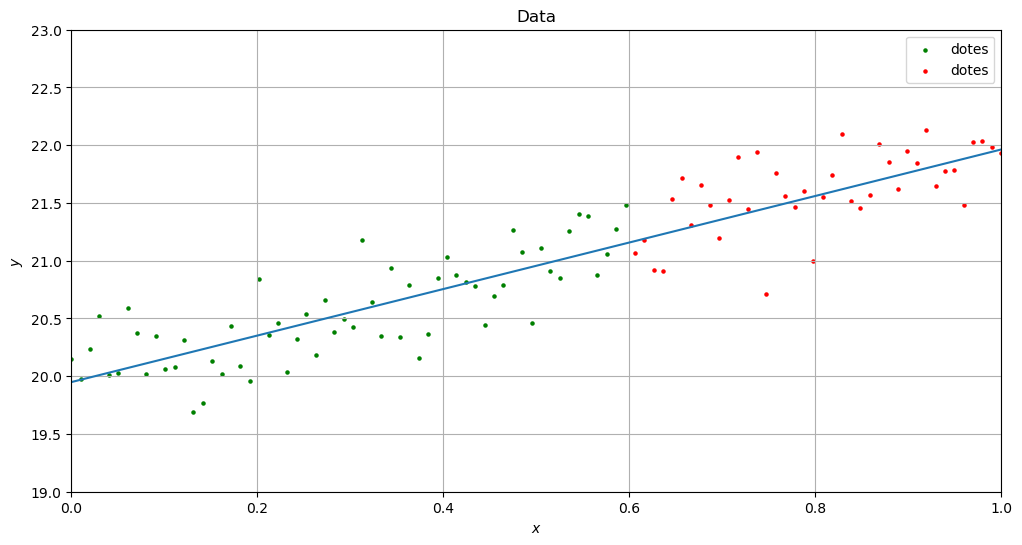

In [22]:
x = np.linspace(0,1,2)
y = b0 + b1 * x
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,1,1)
ax.grid(True)
ax.set_xlim(0,1)
ax.set_ylim(19,23)
x_vals_test = [i[0] for i in test_data_processed] 
y_vals_test = [i[1] for i in test_data_processed]
ax.scatter(x_vals_train, y_vals_train, zorder=1, color='green', label="dotes", s=5)
ax.scatter(x_vals_test, y_vals_test, zorder=1, color='red', label="dotes", s=5)
plt.plot(x,y)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title('Data')
plt.legend()
plt.show(block=False)

## Висновок
Отже, у ході лабораторної роботи було реалізовано лінійну регресію з градієнтним спуском. Модель було натреновано на файлі "lab_1_train.csv", а протестовано на "lab_1_test.csv". Унаслідок навчання було отрмано коефіцієнти b0 = 19.94904 та b1 = 2.01428. Для тренувальних даних значення функції втрат при цих вагах становить 0.07307. При тестуванні було отримано значення функції втрат 0.074300, що загалом майже не перевищує отримане внаслідок навчання. Результати показують, що дані добре генералізуються.